In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
conn = engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
Measurement = Base.classes.measurement
station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [14]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
startdate = '2017-01-01'
enddate = '2017-01-07'
temp_result = calc_temps(startdate,enddate)[0]
temp_result

(62.0, 68.36585365853658, 74.0)

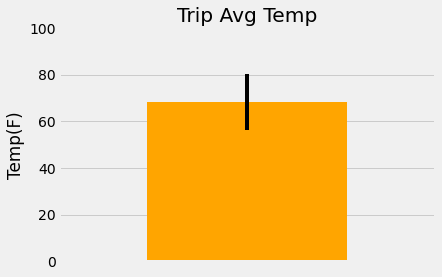

In [17]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x_pos = [0]
y_pos = [temp_result[1]]
error = [(temp_result[2] - temp_result[0])]

plt.bar(x_pos,y_pos,color='orange', yerr=error)
plt.xlim(-0.75,0.75)
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.ylim(0,100)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.grid(which='major', axis='x', linestyle='')
plt.grid(which='major', axis='y', linestyle='-')
plt.show()

### Daily Rainfall Average

In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall=(session.query(Measurement.station,station.name,func.sum(Measurement.prcp),
                                station.latitude,station.longitude,station.elevation)
                         .filter(Measurement.date >= startdate)
                         .filter(Measurement.date <= enddate)
                         .filter(Measurement.station == station.station)
                         .group_by(Measurement.station)
                         .order_by(func.sum(Measurement.prcp)
                         .desc())
                         .all())
total_rainfall

rainfall_df = pd.DataFrame(np.array(total_rainfall))
rainfall_df = rainfall_df.rename(
    columns={
        0: "Station",
        1: "Name",
        2: "Latitude",
        3: "Longitude",
        4: "Elevation",
        5: "Precipitation",
    }
)

rainfall_df

,Station,Name,Latitude,Longitude,Elevation,Precipitation
0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.61,21.33556,-157.71139,19.5
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.6,21.3331,-157.8025,152.4
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.6,21.5213,-157.8374,7.0
3,USC00513117,"KANEOHE 838.1, HI US",0.35,21.4234,-157.8015,14.6
4,USC00519281,"WAIHEE 837.5, HI US",0.2,21.45167,-157.84888999999998,32.9
5,USC00519397,"WAIKIKI 717.2, HI US",0.0,21.2716,-157.8168,3.0


In [24]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [27]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session